<h2 style='text-align: center'> ARTICLE CLASSIFIER  - NLP CAPSTONE PROJECT </h2>

<a id = Section11></a>
### **1.1 Introduction**

A traditional news agency aims to modernize by developing a centralized digital platform to store and categorize news effectively, adapting to changing consumer habits.

The core focus is to build a user-friendly mobile app that personalizes news content based on user preferences, replacing outdated methods of delivery like radio and print.

<a id = Section12></a>
### **1.2 Problem Statement**

Objective: Build a deep learning–based text classification model that can automatically categorize news articles.

Goal: Predict the correct category of a news article (e.g., Sports, Politics, Technology) based on its textual content.

Success Criteria: The model should accurately classify news articles to match user-subscribed categories, enabling personalized content delivery in the mobile app.

<a id = Section2></a>
### **2. Python Library Version**

**Following are the Python Library and its Version Installed**
- sklearn : 1.6.1
- tensorflow : 2.19.0
- gensim  : 4.3.3
- nltk : 3.9.1
- re : 2.2.1
- Keras : 3.10.0
- requests : 2.32.4
- beautifulsoup4 : 4.13.5
- numpy 2.0.2
- pandas 2.2.2
- torch 2.8.0+cu126
- transformers 4.56.2
- tqdm 4.67.1

<a id = Section3></a>
### **3. Install Library**

In [ ]:
!pip install gensim  # 4.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [2]:
import nltk # 3.9.1
import re # 2.2.1
import pandas as pd
from nltk.tokenize import word_tokenize
#from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GlobalMaxPool1D, Dense

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Read the Train DataSet :
df_news_tr = pd.read_csv('/content/Train_data.csv')

In [ ]:
df_news_tr_copy = df_news_tr.copy() # Get the copy of the Original dataset.

<a id = Section4></a>
### **4. Pre-Profiling**

In [ ]:
df_news_tr_copy.info() # Shows the detail about column Data Type, Not null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160682 entries, 0 to 160681
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   REF_NO             160682 non-null  int64 
 1   headline           160676 non-null  object
 2   authors            160682 non-null  object
 3   link               160682 non-null  object
 4   short_description  144885 non-null  object
 5   date               160682 non-null  object
 6   category           160682 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.6+ MB


**Observation**
- From the above details, **headline** and **short_description** have the **NULL** values.

****<h4>4.1 Check the missing values in the Dataset </h4>****

In [ ]:
df_news_tr_copy[df_news_tr_copy['headline'].isna()].sample(5)

,REF_NO,headline,authors,link,short_description,date,category
105055,82270,NaN,"Robert Moran, ContributorRobert Moran leads Br...",https://www.huffingtonpost.com/entry/lincoln-2...,NaN,2015-08-22,POLITICS
48671,95001,NaN,"Natasha Srdoc, ContributorAuthor, Economist, C...",https://www.huffingtonpost.com/entry/us-and-eu...,NaN,2015-03-29,WORLDPOST
97319,101479,NaN,"Gary Snyder, ContributorWriter and Media Strat...",https://www.huffingtonpost.com/entry/beverly-h...,NaN,2015-01-13,MEDIA
36673,100426,NaN,"Gary Snyder, ContributorWriter and Media Strat...",https://www.huffingtonpost.com/entry/disney-ce...,NaN,2015-01-25,BUSINESS
108374,86893,NaN,"Matthew Fox, ContributorRadical theologian Mat...",https://www.huffingtonpost.com/entry/post_9671...,Let everyone not wrapped in tired and disprove...,2015-06-30,RELIGION


In [ ]:
df_news_tr_copy[df_news_tr_copy['short_description'].isna()].sample(5)

,REF_NO,headline,authors,link,short_description,date,category
147816,86753,Motorcycle Safety: One Man's Mission to Change...,"Lorraine Roe, ContributorAuthor, Investigative...",https://www.huffingtonpost.com/entry/motorcycl...,NaN,2015-07-02,HEALTHY LIVING
105055,82270,NaN,"Robert Moran, ContributorRobert Moran leads Br...",https://www.huffingtonpost.com/entry/lincoln-2...,NaN,2015-08-22,POLITICS
128037,55149,Two Stories from the Frontlines of Millennial ...,"Jason Resendez, ContributorLatino Community He...",https://www.huffingtonpost.com/entry/two-stori...,NaN,2016-06-25,LATINO VOICES
8816,101025,Here's What's Really Happening When You Wake U...,Unknown,https://www.huffingtonpost.com/entry/sleep-par...,NaN,2015-01-18,HEALTHY LIVING
54894,92034,"Ancient Samaritan Sect, Straddling Israel and ...",Sophia Jones,https://www.huffingtonpost.com/entry/ancient-s...,NaN,2015-05-03,WORLDPOST


****<h4>4.2 Check the Frequency of the Category Column </h4>****

In [ ]:
df_news_tr_copy['category'].value_counts()

,count
category,
POLITICS,26173
WELLNESS,14279
ENTERTAINMENT,12797
TRAVEL,7957
STYLE & BEAUTY,7698
PARENTING,6952
HEALTHY LIVING,5351
QUEER VOICES,5084
FOOD & DRINK,5020


****<h4>4.2 Check the duplicate records in the Dataset </h4>****

In [ ]:
df_news_tr_copy.duplicated().sum() # Returns the sum of a values - Indicates no of duplicated records.

****<h4>4.3 Author posted News on Different Topics </h4>****

In [ ]:
df_filtered = df_news_tr_copy[df_news_tr_copy['authors'].str.len() < 10]

# Perform the groupby, size, reset_index, and sample operations on the filtered DataFrame
df_new = df_filtered.groupby(['authors', 'category']).size().reset_index(name='count').sample(5)
df_new

,authors,category,count
76,JM Rieger,POLITICS,4
39,Ed Mazza,GOOD NEWS,6
78,Jada Wong,STYLE & BEAUTY,28
123,Nick Wing,CRIME,5
183,Unknown,THE WORLDPOST,1166


##### Same Author posted News in more than one Category. For Example, **Author : "Ed Mazza"** posted News in **Parenting, Media and WORLDPOST**

#### **Summary of the Pre-profiling on the dataset**
1. **Out of 7** features, **2 features have Null values**. ie **headline have 6 Null values**. **short_description have 15797 Null values**. Hence, Null values in these features are handled through web crawl using the given web link.
2. Observed Class Imbalance in Category classes. Eg : **EDUCATION**	have **790 occurances**.
3. Number of **Unknown Author are 29303**. Observed that same Author posted News on different topics. Null values are not handled here as this feature is not a significant factor to determine the specific Category.
**Author : "Ed Mazza"** posted **News in different category : Parenting, Media and WORLDPOST**

<a id = Section5></a>
### **5. Handle the NULL values in the Headlines and Short Description Columns**

In [ ]:
import requests  # Library to make the HTTP requests to the web server
from bs4 import BeautifulSoup # Python Library used for web scrapping

In [ ]:
# Function to web crawl the given web link and fetch the headlines and short description
def fetch_article_info(url):
    # Defines HTTP headers to send with the request.
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) " \
                      "AppleWebKit/537.36 (KHTML, like Gecko) " \
                      "Chrome/117.0.0.0 Safari/537.36"
    }
    try:
        # Tries to make a GET request to the given URL.
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            return None, None
        # Parses the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        title = None
        # Search for the tag and get its content
        og_title_tag = soup.find("meta", property="og:title")
        if og_title_tag and og_title_tag.get("content"):
          raw_title = og_title_tag["content"].strip()
          title = BeautifulSoup(raw_title, 'html.parser').get_text()

        # Extract and clean meta description
        description = None
        desc_tag = soup.find("meta", attrs={"name": "description"})
        if desc_tag and desc_tag.get("content"):
            raw_desc = desc_tag["content"].strip()
            description = BeautifulSoup(raw_desc, 'html.parser').get_text()

        return [title, description]

    except Exception as e:
        return None, None

In [ ]:
import time

In [ ]:
# This code Handles the NULL Value in the headline or the short_description:
# It looks if the headline or the short_desc is null. If so, it passes the url to the fetch_article_info()
# Extract the content, replace the null value.
#
start_time = time.time()

for indx, rows in df_news_tr_copy.iterrows():
  if pd.isna(rows.headline) or pd.isna(rows.short_description):
    url = rows.link
    title, description = fetch_article_info(url)
    if pd.isna(rows.headline):
      df_news_tr_copy.loc[indx,'headline'] = title
    if pd.isna(rows.short_description):
      df_news_tr_copy.loc[indx,'short_description'] = description

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.3f} seconds")

In [ ]:
df_news_tr_copy = pd.read_csv('/content/df_news_tr_copy_null_handled.csv')

In [ ]:
df_news_tr[df_news_tr['REF_NO'] == 171537]

,REF_NO,headline,authors,link,short_description,date,category
134534,171537,Diners Called 'Fat Girls' On Check From Chilly D's Restaurant (VIDEO),Cavan Sieczkowski,https://www.huffingtonpost.com/entry/diners-called-fat-girls-on-restaurant-bill-check-cameo-club-cardroom-lounge_us_5bb2dfeae4b0480ca65dc771,"When their server returned, the three girls questioned him about the ""fat girls"" label, but the waiter denied any wrongdoing",2012-12-09,BUSINESS


In [ ]:
df_news_tr_copy[df_news_tr_copy['REF_NO'] == 171537]

,REF_NO,headline,authors,link,short_description,date,category
134534,171537,Diners Called 'Fat Girls' On Check From Chilly D's Restaurant (VIDEO),Cavan Sieczkowski,https://www.huffingtonpost.com/entry/diners-called-fat-girls-on-restaurant-bill-check-cameo-club-cardroom-lounge_us_5bb2dfeae4b0480ca65dc771,"When their server returned, the three girls questioned him about the ""fat girls"" label, but the waiter denied any wrongdoing",2012-12-09,BUSINESS


In [ ]:
pd.set_option('display.max_colwidth', None)
df_news_tr_copy[df_news_tr_copy['short_description'].isna()]

,REF_NO,headline,authors,link,short_description,date,category
853,200191,"Zach Huston, Victim of Brutal Ohio School Bullying, Tells His Story (VIDEO)","Ian Thompson, Contributor\nLegislative Representative, Washington Legislative Office, ACLU",https://www.huffingtonpost.com/entry/zach-huston-bullying_us_5baf9fa9e4b0ad76925efd83,NaN,2012-02-04,QUEER VOICES
2018,187789,Don't Let Go of Your Dream,"George Heymont, Contributor\nSan Francisco-based arts critic",https://www.huffingtonpost.com/entry/dont-let-go-of-your-dream_us_5bb22b13e4b0171db69e0026,NaN,2012-06-17,CULTURE & ARTS
3825,196277,SXSW Comedy Recap: Day 6,"Samantha Pitchel, Contributor\nWriter, SXSW Comedy",https://www.huffingtonpost.com/entry/sxsw-comedy-recap-day-six_us_5bacfcbee4b04234e8554d40,NaN,2012-03-17,COMEDY
5241,87850,Olivia Culpo Opens Up About Nick Jonas Split,Unknown,https://www.huffingtonpost.comhttp://www.usmagazine.com/celebrity-news/news/olivia-culpo-opens-up-about-heartbreak-after-nick-jonas-split-2015206?utm_source=huffpostlive&utm_medium=referral&utm_campaign=partner,NaN,2015-06-20,ENTERTAINMENT
5733,168327,Safety Off...,"David Trumble, Contributor\nContributor",https://www.huffingtonpost.com/entry/safety-off_us_5ba2bfcfe4b0c2784da58ecc,NaN,2013-01-13,CRIME
...,...,...,...,...,...,...,...
156309,88919,Chris Pratt Got The Sweetest Father's Day Gift Ever,Unknown,https://www.huffingtonpost.comhttp://pubx.ch/1eWYr1u,NaN,2015-06-07,ENTERTAINMENT
157326,90227,Kim Kardashian Posts Touching Wedding Week Throwbacks Before Renewing Vows With Kanye West,Unknown,https://www.huffingtonpost.comhttp://www.usmagazine.com/celebrity-news/news/kim-kardashian-recalls-epic-wedding-celebration-before-vow-renewal-2015235#ixzz3azB7KXUsutm_source=huffpostlive&utm_medium=referral&utm_campaign=partner,NaN,2015-05-23,ENTERTAINMENT
158698,94438,How Your Favorite Celebrities Are Celebrating Easter,Unknown,https://www.huffingtonpost.comhttp://www.popsugar.com/celebrity/Celebrity-Easter-Weekend-Instagrams-2015-37218175#photo-37218175,NaN,2015-04-05,ENTERTAINMENT
159263,135763,"Stolen Moment of the Week: Chad Jamian and Nick Gallo in Bushwick, Brooklyn","Mindy Tucker, Contributor\nPhotographer",https://www.huffingtonpost.com/entry/stolen-moment-of-the-week_us_5bad2ddbe4b04234e857b7fd,NaN,2013-12-22,COMEDY


In [ ]:
# This code removes the below common content if the url redirects to the another website.
text_to_remove = 'Read the latest U.S. and world news, politics, entertainment, lifestyle and opinion pieces from HuffPost’s trusted team of journalists.'

# Get the indices of rows containing the specific text
df_news_tr_copy = df_news_tr_copy[~df_news_tr_copy['short_description'].str.contains(text_to_remove, na=False)]

In [ ]:
df_news_tr_copy.shape

(160644, 7)

In [ ]:
# Check if the content is removed successfully:
pd.set_option('display.max_colwidth', None)
df_news_tr_copy[df_news_tr_copy['short_description'] == 'Read the latest U.S. and world news, politics, entertainment, lifestyle and opinion pieces from HuffPost’s trusted team of journalists.']


,REF_NO,headline,authors,link,short_description,date,category


In [ ]:
df_news_tr_headline = df_news_tr_copy[df_news_tr_copy['headline'].isna()]

In [ ]:
# This step is to find the short description with length < 10 chars.
# Noticed, many short description have emoji, irrevalent words.
filtered_df = df_news_tr_copy[df_news_tr_copy['short_description'].str.len() < 10]
print(filtered_df['REF_NO'], filtered_df['short_description'])

282       71296
416       28779
832        4126
836       76044
889       56687
          ...  
159999    63692
160061    19263
160172    32549
160366    76783
160380     9860
Name: REF_NO, Length: 1087, dtype: int64 282         Brutal.
416         Newman!
832        FINALLY.
836            Aww!
889       Surprise!
            ...    
159999      Hangman
160061         YQY.
160172         Wow.
160366    LBDs FTW.
160380         Oof.
Name: short_description, Length: 1087, dtype: object


<a id = Section31></a>
### **6. Merging Two columns: Headline and Short Description**

In [ ]:
filtered_df.sample(3)

,REF_NO,headline,authors,link,short_description,date,category
100616,18706,"Seth Meyers Goes All In With Brutal Takedown Of 'Lying, Racist' Donald Trump",Rebecca Shapiro,https://www.huffingtonpost.com/entry/seth-meyers-trump-lying-racist-brutal-takedown_us_5995397ae4b0d0d2cc843847,Ruthless.,2017-08-17,COMEDY
146545,174328,Thanksgiving Crafts: Easy Decoration Idea That's Hot On Pinterest,Michelle Manetti,https://www.huffingtonpost.com/entry/thanksgiving-crafts-easy-decorations_us_5b9c8057e4b03a1dcc7f38ed,How cute?,2012-11-09,HOME & LIVING
64984,54237,Ferocious Rat Refuses To Let Hungry Snake Steal Rat Pup,Nina Golgowski,https://www.huffingtonpost.com/entry/rat-vs-snake-video_us_577c0238e4b041646410dfd9,🐭: 1 🐍: 0,2016-07-05,WEIRD NEWS


In [ ]:
# This step is to make the Short Description to Blank for the characters less than 10 chars.
for indx, rows in filtered_df.iterrows():
  df_news_tr_copy.loc[indx,'short_description'] = ''

In [15]:
# This function makes a smart merging the headlines and short description if distinct content.
# Return the short desc if the headline is subset or same as short desc.
# This is to avoid the duplicate content in the headlines and short desc.
def combine_text(row):
    headline = str(row['headline']).strip()
    description = str(row['short_description']).strip()

    if headline and (headline == description or headline in description):
        return description  # headline is duplicate or subset
    else:
        return f"{headline} [SEP] {description}"

In [ ]:
# This steps stores the merged text from the combine_text() function:
df_news_tr_copy['combined_text'] = df_news_tr_copy.apply(combine_text, axis=1)

In [ ]:
# Assign the combined_text to new column to compare the data after cleaning up.
df_news_tr_copy['combined_text_2'] = df_news_tr_copy['combined_text']

In [ ]:
df_news_tr_copy['combined_text_2'].head()

,combined_text_2
0,"Putin, Fear and Leadership [SEP] There are uncomfortable parallels between Hitler's actions in Czechoslovakia and Putin's moves in the Crimea and Ukraine."
1,"Barack Obama Failed To Get A New Climate Law, But His Legacy Might Be Stronger Because Of It [SEP] The fate of climate rules now lies with the Supreme Court."
2,Senate GOP Leaders Want To Put Ted Cruz In A Time Out [SEP] WASHINGTON -- Senate Republican leaders spent a rare Sunday session scolding Ted Cruz. The leaders wagged their fingers at
3,"3 Uncommon Ways to Maintain Your Real Focus [SEP] As someone who has an insatiable desire to know and do everything, I've also come to find three insights particularly helpful. Rather than concrete actions, they serve more as mindsets or perspectives to take on all that is available to us now -- and stay centered on what truly matters to us as individuals."
4,"Trump Wants To Dismantle The Clean Water Rule. Here’s What’s At Stake. [SEP] The drinking water of 117 million people, many threatened species and industries from farming to manufacturing could be at risk."


In [ ]:
# This step removes the spl chars from the combined text column
for indx, rows in df_news_tr_copy.iterrows():
  df_news_tr_copy.loc[indx,'combined_text_2'] = re.sub(r'[^\w\s]', ' ', rows.combined_text_2)

In [ ]:
pd.set_option('display.max_colwidth', None)
df_news_tr_copy.sample(3)

,REF_NO,headline,authors,link,short_description,date,category,combined_text,combined_text_2
128146,139221,Is Apple About Fashion or Technology?,"Scott MacFarland, Contributor\nChief Content Marketer and Digital Strategist",https://www.huffingtonpost.com/entry/is-apple-about-fashion-or_us_5bb36bc2e4b0fa920b985b90,"It's amazing that technology, which is made with plastic, metal, glass, wires and circuit boards can make consumers so excited. That's not substance or superficial. That's brand moxie.",2013-11-16,TECH,"Is Apple About Fashion or Technology? It's amazing that technology, which is made with plastic, metal, glass, wires and circuit boards can make consumers so excited. That's not substance or superficial. That's brand moxie.",Is Apple About Fashion or Technology It s amazing that technology which is made with plastic metal glass wires and circuit boards can make consumers so excited That s not substance or superficial That s brand moxie
3479,125173,"If Chicken Were Blue, Would You Still Want To Eat It?",Carly Ledbetter,https://www.huffingtonpost.com/entry/weird-colored-food-photos_us_5b9dfcc2e4b03a1dcc8ff734,"Would you eat blue chicken, or take a bit out of green ice cream with purple toppings? Look at these photos and decide for yourself!",2014-04-16,FOOD & DRINK,"If Chicken Were Blue, Would You Still Want To Eat It? Would you eat blue chicken, or take a bit out of green ice cream with purple toppings? Look at these photos and decide for yourself!",If Chicken Were Blue Would You Still Want To Eat It Would you eat blue chicken or take a bit out of green ice cream with purple toppings Look at these photos and decide for yourself
142594,30759,Islamic State Beheads Two For 'Sorcery' In Egypt's Sinai,Unknown,https://www.huffingtonpost.com/entry/islamic-state-beheads-two_us_58dabf2ae4b0cb23e65c02c7,"“Apostasy, sorcery, claiming the ability to tell the future, and leading people to polytheism.”",2017-03-28,THE WORLDPOST,"Islamic State Beheads Two For 'Sorcery' In Egypt's Sinai “Apostasy, sorcery, claiming the ability to tell the future, and leading people to polytheism.”",Islamic State Beheads Two For Sorcery In Egypt s Sinai Apostasy sorcery claiming the ability to tell the future and leading people to polytheism


In [ ]:
# Encode categories as numeric labels
label_encoder = LabelEncoder()
df_news_tr_copy['label'] = label_encoder.fit_transform(df_news_tr_copy['category'])

In [ ]:
df_news_tr_copy.to_csv('df_news_tr_copy_preprocessed.csv', index=False)

In [ ]:
# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    df_news_tr_copy['combined_text_2'], df_news_tr_copy['label'], test_size=0.2, stratify=df_news_tr_copy['label'], random_state=42)

****<h4>7. LSTM Model </h4>****

### **We will be exploring the different models - LSTM, GRU and BERT**

In [ ]:
# ---------------------------
# 3. Tokenization and Padding
# ---------------------------
max_words = 20000
max_len = 100

# Tokenize and create word-index mapping from training text.
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Tokenizer to convert text to sequences of numbers:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Padding your sequences so that all of them have the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)

In [ ]:
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Use the raw training text (X_train)
X_train_tokens = [word_tokenize(text.lower()) for text in X_train]

# Train Word2Vec
w2v_model = Word2Vec(
    sentences=X_train_tokens,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

In [ ]:
import numpy as np

In [ ]:
# Matrix can be used to initialize an embedding layer.
# Each row contains the 100-dimensional vector from Word2Vec
embedding_dim = 100
embedding_matrix_w2v = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= num_words:
        continue
    if word in w2v_model.wv:
        embedding_matrix_w2v[i] = w2v_model.wv[word]


**Build & Train the LSTM Model**

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
# ---------------------------
# Build the LSTM Model
# ---------------------------
def build_model(embedding_matrix):
  model = Sequential() # Initialize sequential model
  model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], trainable=True)) # layer turns word IDs into word vectors
  model.add(Bidirectional(LSTM(128, return_sequences=True))) # Reads the text forward and backward, helping the model understand more context.
  model.add(Dropout(0.25)) # Randomly "drops" 25% of the neurons during training
  model.add(GlobalMaxPool1D()) # layer takes the most important feature from each sequence
  model.add(Dense(64, activation='relu')) # adds non-linearity — helps the model learn complex patterns.
  model.add(Dropout(0.25))
  model.add(Dense(len(label_encoder.classes_), activation='softmax')) # softmax turns the outputs into probabilities for each class.
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Tells the model how to calculate the error
  return model

model_w2v = build_model(embedding_matrix_w2v)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ---------------------------
# It helps to automatically stop training when the model stops improving, so you don't overfit or waste time.
# ---------------------------
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

model_w2v.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=15,
    batch_size=128,
    callbacks=[early_stop]
)

Epoch 1/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 759s 751ms/step - accuracy: 0.3870 - loss: 2.4258 - val_accuracy: 0.5567 - val_loss: 1.6989
Epoch 2/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 719s 716ms/step - accuracy: 0.5743 - loss: 1.5848 - val_accuracy: 0.6054 - val_loss: 1.4657
Epoch 3/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 741s 737ms/step - accuracy: 0.6428 - loss: 1.2986 - val_accuracy: 0.6219 - val_loss: 1.3717
Epoch 4/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 716s 712ms/step - accuracy: 0.6831 - loss: 1.1216 - val_accuracy: 0.6214 - val_loss: 1.3644
Epoch 5/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 765s 761ms/step - accuracy: 0.7216 - loss: 0.9720 - val_accuracy: 0.6258 - val_loss: 1.3447
Epoch 6/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 726s 722ms/step - accuracy: 0.7510 - loss: 0.8461 - val_accuracy: 0.6202 - val_loss: 1.3697
Epoch 7/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 728s 708ms/step - accuracy: 0.7797 - loss: 0.7387 - val_accuracy: 0.6145 - val_loss: 1.4246


In [ ]:
# ---------------------------
# 8. Evaluate on Train Set (Optional)
# ---------------------------
train_loss, train_acc = model_w2v.evaluate(X_train_pad, y_train)
print(f"Training Accuracy: {train_acc:.4f}")


4017/4017 ━━━━━━━━━━━━━━━━━━━━ 333s 83ms/step - accuracy: 0.7834 - loss: 0.7899
Training Accuracy: 0.7815


In [ ]:
# Once you receive the validation/test dataset, just evaluate the model using:

In [ ]:
val_loss, val_acc = model_w2v.evaluate(X_val_pad, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

1005/1005 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6257 - loss: 1.3439
Validation Accuracy: 0.6258


**LSTM Model : Train Accuracy : 0.7815, Val Accuracy : 0.6258**


****<h4>8 GRU Model </h4>****

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
# ---------------------------
# 6. Build the GRU Model
# ---------------------------
def build_model(embedding_matrix):
  model = Sequential()
  model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], trainable=True))
  model.add(Bidirectional(GRU(128, return_sequences=True)))
  model.add(Dropout(0.25))
  model.add(GlobalMaxPool1D())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(len(label_encoder.classes_), activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model_w2v_gru = build_model(embedding_matrix_w2v)

In [ ]:
# ---------------------------
# Train the Model
# ---------------------------
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

model_w2v_gru.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=15,
    batch_size=128,
    callbacks=[early_stop]
)

Epoch 1/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 713s 703ms/step - accuracy: 0.3539 - loss: 2.5725 - val_accuracy: 0.5432 - val_loss: 1.7103
Epoch 2/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 741s 737ms/step - accuracy: 0.5569 - loss: 1.6500 - val_accuracy: 0.6024 - val_loss: 1.5075
Epoch 3/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 716s 712ms/step - accuracy: 0.6252 - loss: 1.3544 - val_accuracy: 0.6185 - val_loss: 1.3984
Epoch 4/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 734s 731ms/step - accuracy: 0.6727 - loss: 1.1679 - val_accuracy: 0.6231 - val_loss: 1.3626
Epoch 5/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 724s 720ms/step - accuracy: 0.7065 - loss: 1.0204 - val_accuracy: 0.6172 - val_loss: 1.3836
Epoch 6/15
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 745s 741ms/step - accuracy: 0.7390 - loss: 0.8872 - val_accuracy: 0.6170 - val_loss: 1.4112


**GRU Model** : Train Accuracy : **0.7390**, Val Accuracy :  **0.6170**

**9 BERT Model**

In [ ]:
import pandas as pd

In [ ]:
df_news_tr_copy = pd.read_csv('/content/df_news_tr_copy_preprocessed.csv', engine='python')

In [ ]:
df_news_tr_copy.shape

(160644, 10)

In [ ]:
!pip install transformers scikit-learn torch

In [ ]:
import torch # Library used for building and training neural networks.
from torch.utils.data import DataLoader, TensorDataset # Handling and batching datasets efficiently during training and evaluation.
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification # DistilBERT for turning text into tokens and classifying sequences
from torch.optim import AdamW
from sklearn.model_selection import train_test_split # Splits your data into training and test
from sklearn.metrics import classification_report, accuracy_score # Gives evaluation metrics like accuracy, precision, recall, and F1-score after model predictions.

In [ ]:
train_texts = df_news_tr_copy['combined_text_2'].tolist() # Convert the series of string into List
train_labels = df_news_tr_copy['label'].tolist() # This converts the label column of dataframe into list

In [ ]:
# Split the Train and val data
# Drop rows with NaN in 'label' before splitting
df_news_tr_copy.dropna(subset=['label'], inplace=True)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_news_tr_copy['combined_text_2'].tolist(),
    df_news_tr_copy['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df_news_tr_copy['label'].tolist()) # Stratify requires a list or array-like

In [ ]:
# NOT Excuted - returned error

# Tokenize without truncation
# Make sure to run the cell defining the 'tokenizer' first
token_lens = [len(tokenizer.encode(text, truncation=False)) for text in train_texts]

import matplotlib.pyplot as plt
plt.hist(token_lens, bins=50, color='skyblue')
plt.title("Distribution of Token Lengths")
plt.xlabel("Token count")
plt.ylabel("Number of samples")
plt.show()

print(f"Max token length: {max(token_lens)}")
print(f"95th percentile: {np.percentile(token_lens, 95)}")

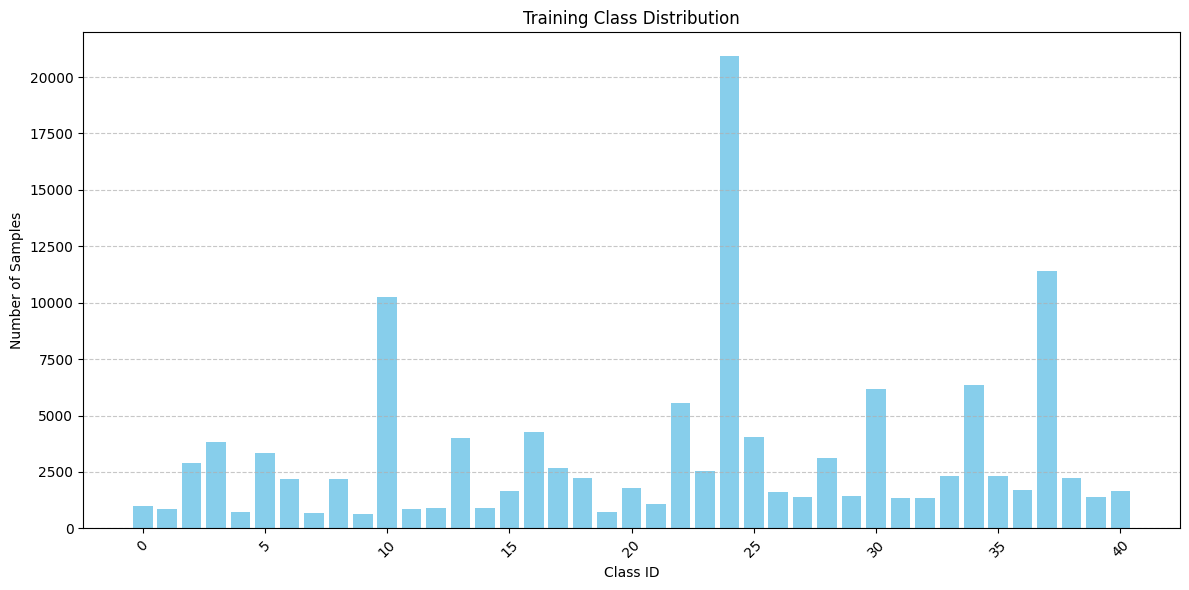

In [ ]:
# Optional: Visualize class imbalance
from collections import Counter
import matplotlib.pyplot as plt

# Count labels in the training set
label_counts = Counter(train_labels)

# Plot distribution
plt.figure(figsize=(12, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title("Training Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Make sure you have train_labels as a list or array of class indices
class_labels = np.unique(train_labels)

# Compute weights (balanced = higher weight for rare classes)
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=train_labels)

# Convert to PyTorch tensor and send to GPU if using CUDA
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [ ]:
# Loads a pre-trained DistilBERT model for text classification
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
num_labels = len(set(train_labels))
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)
model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
# This code prepares your text data by converting it into token IDs and attention masks,
# so it’s ready to be used in a DistilBERT model for training or evaluation.
max_length = 128
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors="pt")
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=max_length, return_tensors="pt")

In [ ]:
# Convert lists to tensors
train_input_ids = torch.tensor(train_encodings['input_ids'])
train_attention_mask = torch.tensor(train_encodings['attention_mask'])
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

/tmp/ipython-input-2275663693.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_input_ids = torch.tensor(train_encodings['input_ids'])
/tmp/ipython-input-2275663693.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_attention_mask = torch.tensor(train_encodings['attention_mask'])


In [ ]:
# Convert lists to tensors
val_input_ids = torch.tensor(val_encodings['input_ids'])
val_attention_mask = torch.tensor(val_encodings['attention_mask'])
val_labels_tensor = torch.tensor(val_labels)

/tmp/ipython-input-1760983345.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_input_ids = torch.tensor(val_encodings['input_ids'])
/tmp/ipython-input-1760983345.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_attention_mask = torch.tensor(val_encodings['attention_mask'])


In [ ]:
# Dataset and DataLoader
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
val_dataset = TensorDataset(val_input_ids, val_attention_mask, val_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

In [ ]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
save_path = "/content/drive/MyDrive/article_category_model/checkpoints"
os.makedirs(save_path, exist_ok=True)

In [ ]:
# === 3. Run training from epoch 1 to 10 ===
from tqdm.notebook import tqdm
# === Setup ===
start_epoch = 0
end_epoch = 10

# === Early stopping variables ===
best_val_acc = 0
patience = 2
epochs_without_improvement = 0

for epoch in range(start_epoch, end_epoch):
    model.train()
    total_loss = 0
    all_train_preds = []
    all_train_labels = []

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False)

    for input_ids, attention_mask, labels in progress_bar:
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        loss = torch.nn.functional.cross_entropy(outputs.logits,labels,weight=class_weights_tensor,label_smoothing=0.1)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        preds = outputs.logits.argmax(dim=1)
        all_train_preds.extend(preds.cpu().tolist())
        all_train_labels.extend(labels.cpu().tolist())

        progress_bar.set_postfix(loss=loss.item())

    # === Training metrics ===
    avg_loss = total_loss / len(train_loader)
    train_acc = accuracy_score(all_train_labels, all_train_preds)
    print(f"Epoch {epoch+1} — Loss: {avg_loss:.4f} — Train Accuracy: {train_acc:.4f}")

    # === Validation after each epoch ===
    model.eval()
    all_val_preds, all_val_labels = [], []

    with torch.no_grad():
        for input_ids, attention_mask, labels in val_loader:
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = outputs.logits.argmax(dim=1)

            all_val_preds.extend(preds.cpu().tolist())
            all_val_labels.extend(labels.cpu().tolist())

    val_acc = accuracy_score(all_val_labels, all_val_preds)
    print(f"Epoch {epoch+1} — Validation Accuracy: {val_acc:.4f}")

    # === Save checkpoint for this epoch ===
    checkpoint_save_path = f"{save_path}/epoch_{epoch+1}"
    model.save_pretrained(checkpoint_save_path)
    tokenizer.save_pretrained(checkpoint_save_path)

    # === Early Stopping Logic ===
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
        best_model_path = f"{save_path}/best_model"
        model.save_pretrained(best_model_path )
        tokenizer.save_pretrained(best_model_path)
        print(f"New best model saved (val_acc = {val_acc:.4f})")
    else:
        epochs_without_improvement += 1
        print(f"No improvement for {epochs_without_improvement} epoch(s)")

    if epochs_without_improvement >= patience:
        print(f"\nEarly stopping triggered at epoch {epoch+1}")
        break

Epoch 1:   0%|          | 0/16065 [00:00<?, ?it/s]

Epoch 1 — Loss: 2.5153 — Train Accuracy: 0.5705
Epoch 1 — Validation Accuracy: 0.6281
New best model saved (val_acc = 0.6281)


Epoch 2:   0%|          | 0/16065 [00:00<?, ?it/s]

Epoch 2 — Loss: 2.1015 — Train Accuracy: 0.6775
Epoch 2 — Validation Accuracy: 0.6449
New best model saved (val_acc = 0.6449)


Epoch 3:   0%|          | 0/16065 [00:00<?, ?it/s]

Epoch 3 — Loss: 1.8721 — Train Accuracy: 0.7442
Epoch 3 — Validation Accuracy: 0.6588
New best model saved (val_acc = 0.6588)


Epoch 4:   0%|          | 0/16065 [00:00<?, ?it/s]

Epoch 4 — Loss: 1.6926 — Train Accuracy: 0.8011
Epoch 4 — Validation Accuracy: 0.6478
No improvement for 1 epoch(s)


Epoch 5:   0%|          | 0/16065 [00:00<?, ?it/s]

Epoch 5 — Loss: 1.5660 — Train Accuracy: 0.8456
Epoch 5 — Validation Accuracy: 0.6494
No improvement for 2 epoch(s)

Early stopping triggered at epoch 5


In [ ]:
# 9. Evaluation
model.eval()
all_preds, all_labels = [], []

eval_progress = tqdm(val_loader, desc="Evaluating", leave=False)

with torch.no_grad():
    for input_ids, attention_mask, labels in eval_progress:
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

Evaluating:   0%|          | 0/4017 [00:00<?, ?it/s]

In [ ]:
# 10. Metrics
val_acc = accuracy_score(all_labels, all_preds)
print(f"\nValidation Accuracy: {val_acc:.4f}\n")
print("Classification Report:")
print(classification_report(all_labels, all_preds))


Validation Accuracy: 0.6494

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.62      0.49       245
           1       0.46      0.64      0.54       209
           2       0.42      0.62      0.50       722
           3       0.51      0.60      0.55       962
           4       0.38      0.57      0.45       184
           5       0.55      0.53      0.54       835
           6       0.63      0.61      0.62       545
           7       0.49      0.44      0.46       165
           8       0.71      0.83      0.77       542
           9       0.43      0.47      0.45       158
          10       0.82      0.59      0.69      2559
          11       0.57      0.51      0.54       211
          12       0.36      0.51      0.42       225
          13       0.73      0.74      0.73      1004
          14       0.32      0.44      0.37       225
          15       0.36      0.71      0.48       418
          16       0.41     

In [ ]:
# 11. Optional: Save the model
# model.save_pretrained("./distilbert_model_cpu")
# tokenizer.save_pretrained("./distilbert_model_cpu")

In [ ]:
# === 12. Save final model ===
final_path = f"{save_path}/final_model"
model.save_pretrained(final_path)
tokenizer.save_pretrained(final_path)
print(f"\n Final model saved to: {final_path}")


 Final model saved to: /content/drive/MyDrive/article_category_model/checkpoints/final_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# !cp -r /content/best_model /content/drive/MyDrive/best_model_11_oct

In [ ]:
category_labels = label_encoder.classes_  # If you used one

In [ ]:
category_labels

array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
       'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
       'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
       'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
       'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
       'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST',
       'TRAVEL', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS', 'WOMEN',
       'WORLD NEWS', 'WORLDPOST'], dtype=object)

Step 3: Run classification_report

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(all_val_labels, all_val_preds, target_names=category_labels))

Classification Report:
                precision    recall  f1-score   support

          ARTS       0.40      0.62      0.49       245
ARTS & CULTURE       0.46      0.64      0.54       209
  BLACK VOICES       0.42      0.62      0.50       722
      BUSINESS       0.51      0.60      0.55       962
       COLLEGE       0.38      0.57      0.45       184
        COMEDY       0.55      0.53      0.54       835
         CRIME       0.63      0.61      0.62       545
CULTURE & ARTS       0.49      0.44      0.46       165
       DIVORCE       0.71      0.83      0.77       542
     EDUCATION       0.43      0.47      0.45       158
 ENTERTAINMENT       0.82      0.59      0.69      2559
   ENVIRONMENT       0.57      0.51      0.54       211
         FIFTY       0.36      0.51      0.42       225
  FOOD & DRINK       0.73      0.74      0.73      1004
     GOOD NEWS       0.32      0.44      0.37       225
         GREEN       0.36      0.71      0.48       418
HEALTHY LIVING       0.4

<a id = Section9></a>
### 9. Pre-profiling Test Data

In [3]:
# Read Test Data
df_test = pd.read_csv('/content/Test_data.csv')

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REF_NO             40171 non-null  int64 
 1   headline           40171 non-null  object
 2   authors            40171 non-null  object
 3   link               40171 non-null  object
 4   short_description  36256 non-null  object
 5   date               40171 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [5]:
df_test.head()

,REF_NO,headline,authors,link,short_description,date
0,146508,Lindsay Lohan Clarifies Venice Film Festival A...,Unknown,https://www.huffingtonpost.com/entry/lindsay-l...,Lohan had already expressed her support for he...,2013-08-31
1,90083,Marco Rubio and the Challenge to Hillary Clinton,"Hoyt Hilsman, ContributorAuthor, journalist an...",https://www.huffingtonpost.com/entry/marco-rub...,The conventional wisdom among Democrats is tha...,2015-05-25
2,57183,Shoutout To Woke Companies: You Could Win $100...,Sarah Ruiz-Grossman,https://www.huffingtonpost.com/entry/macarthur...,“Solving society’s most pressing problems isn’...,2016-06-02
3,11632,'Religious Freedom' Clauses Are Point Of Conte...,Lydia O'Connor,https://www.huffingtonpost.com/entry/australia...,Australians voted in favor of legalizing same-...,2017-11-16
4,196326,What It Would Really Be Like to Be Married to ...,"Jenny Isenman, Contributor\nJenny From the Blo...",https://www.huffingtonpost.com/entry/christian...,Why can't our hubby's be more like Christian G...,2012-03-16


****<h4>9.1 Check the missing values in the Dataset </h4>****

In [6]:
df_test['short_description'].isna().sum()

np.int64(3915)

In [7]:
df_test[df_test['short_description'].isna()].head()

,REF_NO,headline,authors,link,short_description,date
10,87750,15 Photos that Capture the Magic of Aviation,"DL Cade, ContributorWordsmith, photo nerd, sit...",https://www.huffingtonpost.com/entry/15-photos...,NaN,2015-06-21
12,48292,A New Digital Art Museum In Paris - What The H...,"Sidonie Sawyer, ContributorBorn in France, imm...",https://www.huffingtonpost.com/entry/a-new-dig...,NaN,2016-09-11
23,118557,Over,"Lisa K. Brown, ContributorFreelance writer and...",https://www.huffingtonpost.com/entry/featured-...,NaN,2014-07-02
25,99964,Serena Williams: How to Stand Out and Win,"Jimmy Nguyen, ContributorBlogger - JimmyWin.co...",https://www.huffingtonpost.com/entry/serena-wi...,NaN,2015-01-31
39,101735,Six Things We Learned From The 'Mad Men' TCA P...,Unknown,https://www.huffingtonpost.com/entry/mad-men-t...,NaN,2015-01-10


<a name = Section9.2></a>

---
# **9.2. Test Data Observation**
---

- Total Number of Rows in Test Data : **40171**
- Number of **Null values** in **short description : 3915**

<a name = Section10></a>

---
# **10. Test Data Implementation**
---

In [8]:
import requests
from bs4 import BeautifulSoup

def fetch_article_info(url):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/117.0.0.0 Safari/537.36"
        )
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)

        if response.status_code != 200:
            return None

        soup = BeautifulSoup(response.text, "html.parser")

        # Select the desired <p> tags inside the divs
        text_blocks = soup.select('div.primary-cli.cli-text p')

        descriptions = []  # Store all text blocks

        for p in text_blocks:
            text = p.get_text(strip=True)
            if text:
              descriptions.append(text)

        return descriptions[0] if descriptions else None

    except Exception as e:
        print(f"Error: {e}")  # Useful for debugging
        return None

In [9]:
import time

In [12]:
# Handle NULL Value
start_time = time.time()

for indx, rows in df_test.iterrows():
  if pd.isna(rows.short_description):
    url = rows.link
    description = fetch_article_info(url)
    if pd.isna(rows.short_description):
      df_test.loc[indx,'short_description'] = description

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.3f} seconds")

Error: HTTPSConnectionPool(host='www.huffingtonpost.comhttp', port=443): Max retries exceeded with url: /www.justjared.com/2015/04/11/jennifer-lopez-flashes-toned-abs-at-casper-smarts-28th-birthday-celebration/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7e6f02c0eff0>: Failed to resolve 'www.huffingtonpost.comhttp' ([Errno -2] Name or service not known)"))
Error: HTTPSConnectionPool(host='www.huffingtonpost.comhttp', port=443): Max retries exceeded with url: /www.vulture.com/2015/01/elton-john-alan-ball-are-making-an-hbo-pilot.html (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7e6f005c5f40>: Failed to resolve 'www.huffingtonpost.comhttp' ([Errno -2] Name or service not known)"))
Error: HTTPSConnectionPool(host='www.huffingtonpost.comhttp', port=443): Max retries exceeded with url: /insidetv.ew.com/2014/07/26/why-george-r-r-martin-wont-write-a-thrones-episode-this-season/ (Caused by NameResolutionError("<urllib3.conne

In [18]:
df_test.to_csv("/content/Test_data_webcrawl.csv")

In [13]:
df_test['short_description'].isna().sum() #132

np.int64(185)

In [16]:
df_test['combined_text'] = df_test.apply(combine_text, axis=1)

In [19]:
df_test['combined_text'].sample(3)

,combined_text
2193,Charter School Advocates Play The Race Card [S...
17071,NYC Tech Scene Rising: Week of Feb 4th [SEP] T...
33118,'Orange Is The New Black' Star Samira Wiley An...


In [20]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader
import torch

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
!cp -r /content/drive/MyDrive/article_category_model /content/article_category_model

In [23]:
model_path = "/content/article_category_model/checkpoints/best_model"  # path to your saved checkpoint directory

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [24]:

# --------------------------
# Step 3: Tokenize raw text with Hugging Face tokenizer
# --------------------------
test_texts = df_test['combined_text'].tolist()

test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding=True,
    max_length=256,
    return_tensors="pt"
)


In [25]:
# --------------------------
# Step 4: Create DataLoader for test data
# --------------------------
test_dataset = TensorDataset(
    test_encodings['input_ids'],
    test_encodings['attention_mask']
)

test_loader = DataLoader(test_dataset, batch_size=64)

In [26]:
import tqdm

In [27]:
# --------------------------
# Step 5: Run inference with progress bar
# --------------------------
all_preds = []

with torch.no_grad():
    for batch in tqdm.tqdm(test_loader, desc="Predicting"):
        input_ids = batch[0].to(device, non_blocking=True)
        attention_mask = batch[1].to(device, non_blocking=True)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())

Predicting: 100%|██████████| 628/628 [04:31<00:00,  2.32it/s]


In [28]:
# --------------------------
# Step 6: Store predictions
# --------------------------
df_test['predictions'] = all_preds

# --------------------------
# Step 7: View results
# --------------------------
print(df_test[['combined_text', 'predictions']])

                                           combined_text  predictions
0      Lindsay Lohan Clarifies Venice Film Festival A...           10
1      Marco Rubio and the Challenge to Hillary Clint...           24
2      Shoutout To Woke Companies: You Could Win $100...           18
3      'Religious Freedom' Clauses Are Point Of Conte...           26
4      What It Would Really Be Like to Be Married to ...           35
...                                                  ...          ...
40166  If A-Rod Plays Well What Will the Yankees Do? ...           28
40167  5 Ways To Stay In Jamaica (PHOTOS) [SEP] We've...           34
40168  World Basketball’s Governing Body To Reconside...           28
40169  Jaden Smith Goes To Prom With 'Hunger Games' A...           10
40170  The Stripped-Down History Of Underwear, From W...            0

[40171 rows x 2 columns]


In [ ]:
df_test[['REF_NO', 'predictions']].to_csv("bert_refno_category_final.csv", index=False, header=False)

In [29]:
df_test.sample(3)

,REF_NO,headline,authors,link,short_description,date,combined_text,predictions
21122,39119,"Lest We Forget, America Suffered Its Deadliest...",Andy Campbell,https://www.huffingtonpost.com/entry/gun-viole...,We're at the point where the bloodshed is all ...,2016-12-23,"Lest We Forget, America Suffered Its Deadliest...",6
37163,36895,Read More Updates From Trump Picks' Confirmati...,Paige Lavender,https://www.huffingtonpost.com/entry/trump-cab...,Four more people face questions today.,2017-01-18,Read More Updates From Trump Picks' Confirmati...,24
31626,71771,Bernie Sanders Picks Up A Major Union Endorsement,Dave Jamieson,https://www.huffingtonpost.com/entry/bernie-sa...,It's his biggest one yet.,2015-12-17,Bernie Sanders Picks Up A Major Union Endorsem...,24


In [30]:
df_test['combined_text'].sample(5)

,combined_text
34467,This Little Kid Had No Idea He Was Playing Bas...
14424,BeautyDNA: The Pandora Of Primping [SEP] In th...
25564,The South's Rising Progressive Stars [SEP] The...
21229,America Ferrera Reveals She Was Sexually Assau...
31254,Want To Be Ready For Retirement? Lower Your Ex...


In [31]:
from sklearn.preprocessing import LabelEncoder

In [35]:
try:
    df_train_preprocessed = pd.read_csv('/content/Train_data.csv')
    original_label_list = df_train_preprocessed['category'].tolist()
except FileNotFoundError:
    print("Error: df_news_tr_copy_preprocessed.csv not found. Please ensure the preprocessed training data is available.")

    if 'df_news_tr_copy' in locals():
        original_label_list = df_news_tr_copy['category'].tolist()
    else:
        original_label_list = [] # Or handle the error as appropriate

if original_label_list:
    le = LabelEncoder()
    # Fit on the training data categories to create the mapping
    le.fit(original_label_list)

    # Convert numerical predictions back to original category names using the fitted LabelEncoder
    df_test['category'] = le.inverse_transform(df_test['predictions'])

    # Display the first few rows with the new predicted category column
    display(df_test[['REF_NO', 'combined_text', 'predictions', 'category']].head())
else:
    print("Could not load original training labels to initialize LabelEncoder.")

,REF_NO,combined_text,predictions,category
0,146508,Lindsay Lohan Clarifies Venice Film Festival A...,10,ENTERTAINMENT
1,90083,Marco Rubio and the Challenge to Hillary Clint...,24,POLITICS
2,57183,Shoutout To Woke Companies: You Could Win $100...,18,IMPACT
3,11632,'Religious Freedom' Clauses Are Point Of Conte...,26,RELIGION
4,196326,What It Would Really Be Like to Be Married to ...,35,WEDDINGS


In [36]:
# Select the REF_NO and category columns and save to CSV without index or header
df_test[['REF_NO', 'category']].to_csv("Test_Prediction.csv", index=False, header=False)

display(df_test[['REF_NO', 'category']].head())

,REF_NO,category
0,146508,ENTERTAINMENT
1,90083,POLITICS
2,57183,IMPACT
3,11632,RELIGION
4,196326,WEDDINGS


<a name = Section8></a>

---
# **Conclusion**
---

Below is the Model Performance. BERT ran for 5 epoch and produced the better results.
- **LSTM Model** : **Train** Accuracy : **0.7815**, **Val** Accuracy : **0.6258**
- **GRU Model**  : **Train** Accuracy : **0.7390**, **Val** Accuracy : **0.6170**
- **BERT Model** : **Validation** Accuracy: **0.6954**

- When evaluated the BERT model in the **Test Data** shows the **64%** accuracy